# Raisin Class Prediction

Data Set Information:

Images of Kecimen and Besni raisin varieties grown in Turkey were obtained with CVS. A total of 900 raisin grains were used, including 450 pieces from both varieties. These images were subjected to various stages of pre-processing and 7 morphological features were extracted. These features have been classified using three different artificial intelligence techniques.


Attribute Information:

1. Area: Gives the number of pixels within the boundaries of the raisin.
2. Perimeter: It measures the environment by calculating the distance between the boundaries of the raisin and the pixels around it.
3. MajorAxisLength: Gives the length of the main axis, which is the longest line that can be drawn on the raisin.
4. MinorAxisLength: Gives the length of the small axis, which is the shortest line that can be drawn on the raisin.
5. Eccentricity: It gives a measure of the eccentricity of the ellipse, which has the same moments as raisins.
6. ConvexArea: Gives the number of pixels of the smallest convex shell of the region formed by the raisin.
7. Extent: Gives the ratio of the region formed by the raisin to the total pixels in the bounding box.
8. Class: Kecimen and Besni raisin.

https://archive.ics.uci.edu/ml/datasets/Raisin+Dataset

# Import libraries

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

%matplotlib inline
#%matplotlib notebook
plt.rcParams["figure.figsize"] = (10,6)
import warnings
warnings.filterwarnings("ignore")
warnings.warn("this will not show")
pd.set_option('display.float_format', lambda x: '%.3f' % x)

In [2]:
df = pd.read_csv("Raisin_Dataset.csv")

In [3]:
df.head()

,Area,MajorAxisLength,MinorAxisLength,Eccentricity,ConvexArea,Extent,Perimeter,Class
0,87524,442.246,253.291,0.820,90546,0.759,1184.040,Kecimen
1,75166,406.691,243.032,0.802,78789,0.684,1121.786,Kecimen
2,90856,442.267,266.328,0.798,93717,0.638,1208.575,Kecimen
3,45928,286.541,208.760,0.685,47336,0.700,844.162,Kecimen
4,79408,352.191,290.828,0.564,81463,0.793,1073.251,Kecimen


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 900 entries, 0 to 899
Data columns (total 8 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Area             900 non-null    int64  
 1   MajorAxisLength  900 non-null    float64
 2   MinorAxisLength  900 non-null    float64
 3   Eccentricity     900 non-null    float64
 4   ConvexArea       900 non-null    int64  
 5   Extent           900 non-null    float64
 6   Perimeter        900 non-null    float64
 7   Class            900 non-null    object 
dtypes: float64(5), int64(2), object(1)
memory usage: 56.4+ KB


900 veri bosveri yok. Bir tane object string degeri float 5 deger 2 tane integer var. Logistic Regresyon yapacagimizdan target class, digerleri bagimli degiskenlerimiz.

In [5]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
Area,900.000,87804.128,39002.111,25387.000,59348.000,78902.000,105028.250,235047.000
MajorAxisLength,900.000,430.930,116.035,225.630,345.443,407.804,494.187,997.292
MinorAxisLength,900.000,254.488,49.989,143.711,219.111,247.848,279.889,492.275
Eccentricity,900.000,0.782,0.090,0.349,0.742,0.799,0.843,0.962
ConvexArea,900.000,91186.090,40769.290,26139.000,61513.250,81651.000,108375.750,278217.000
Extent,900.000,0.700,0.053,0.380,0.671,0.707,0.735,0.835
Perimeter,900.000,1165.907,273.764,619.074,966.411,1119.509,1308.390,2697.753


std meandan buyuk degil max ile 75 lik kismi min ile 25lik arasinda cok buyuk fark yok. outlier icin boxplota bakilir.

## Exploratory Data Analysis and Visualization

In [6]:
df['Class'].value_counts()

Kecimen    450
Besni      450
Name: Class, dtype: int64

Balance data

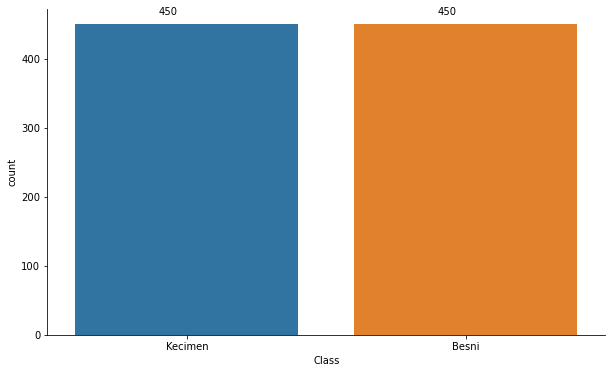

In [7]:
ax = sns.countplot(df['Class'])
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
for p in ax.patches:
    ax.annotate(str(p.get_height()), (p.get_x() + 0.3, p.get_height() * 1.03));

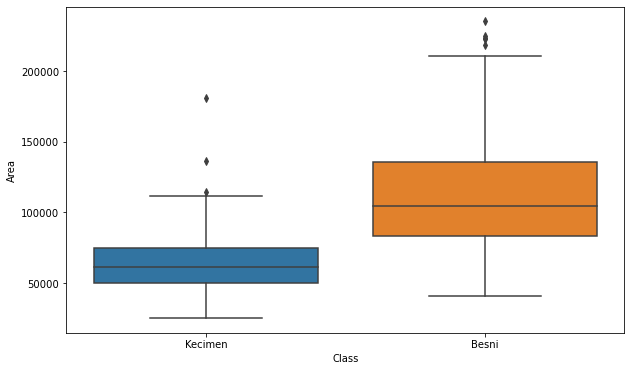

In [8]:
sns.boxplot(x = "Class", y = "Area", data = df);

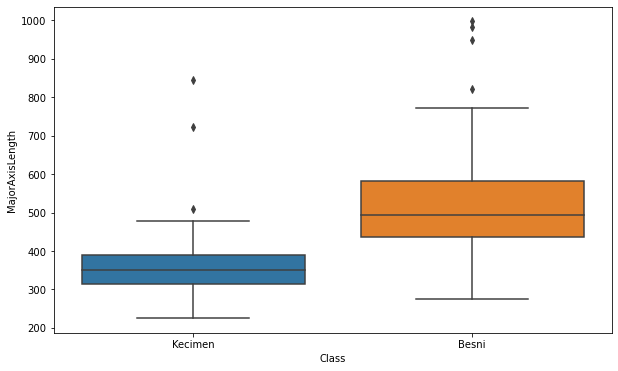

In [9]:
sns.boxplot(x = "Class", y = "MajorAxisLength", data = df);

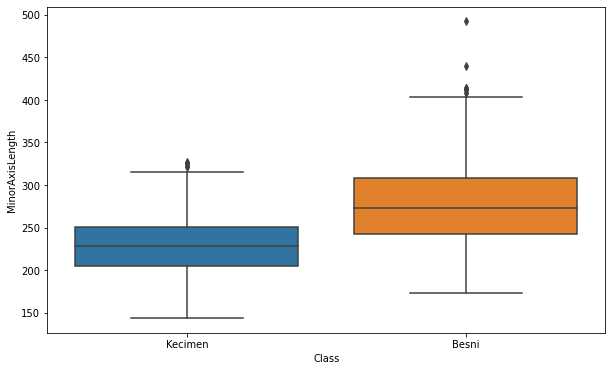

In [10]:
sns.boxplot(x = "Class", y = "MinorAxisLength", data = df);

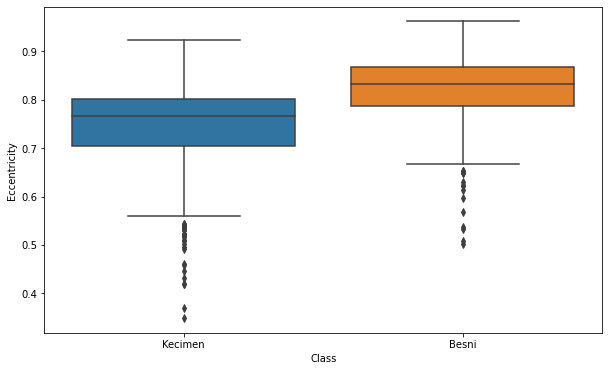

In [11]:
sns.boxplot(x = "Class", y = "Eccentricity", data = df);

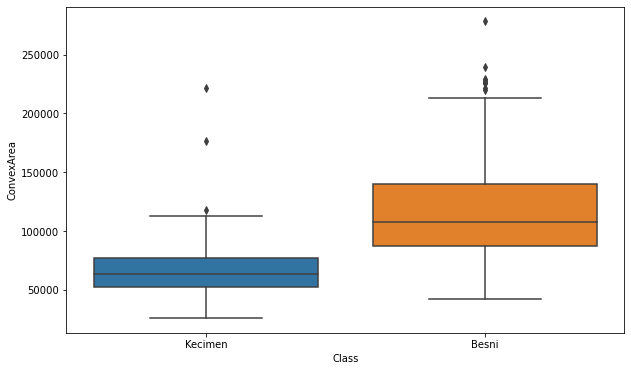

In [12]:
sns.boxplot(x = "Class", y = "ConvexArea", data = df);

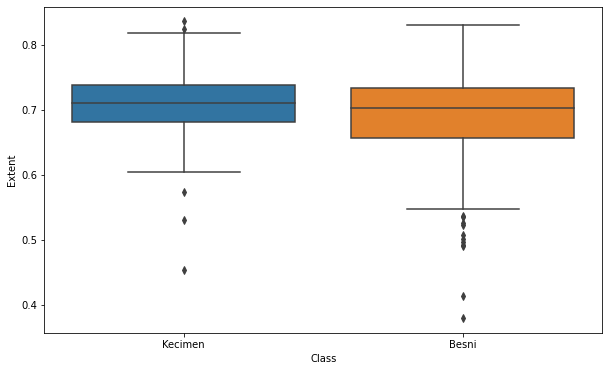

In [13]:
sns.boxplot(x = "Class", y = "Extent", data = df);

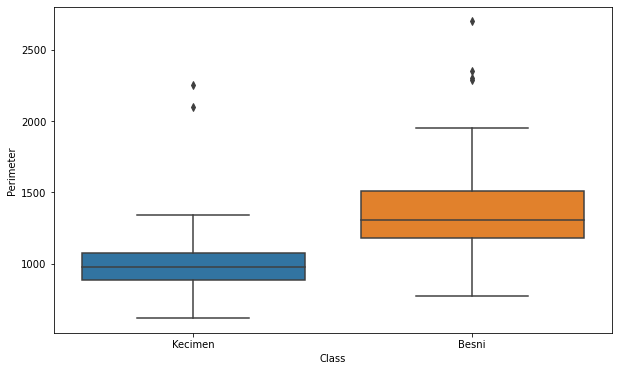

In [14]:
sns.boxplot(x = "Class", y = "Perimeter", data = df);

Tum featurelerde outlier var.

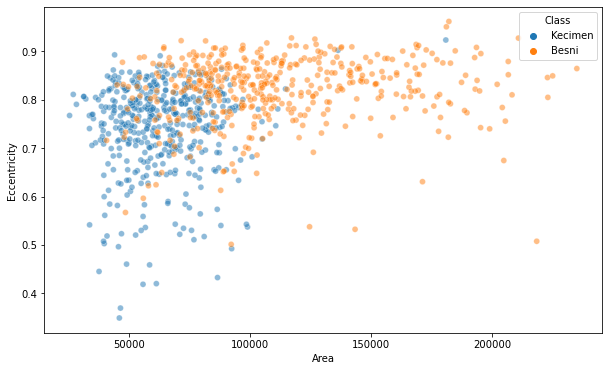

In [15]:
sns.scatterplot(x = "Area", y = "Eccentricity", data = df, hue = "Class", alpha = 0.5);

Orta kesimde ayrisma yok.


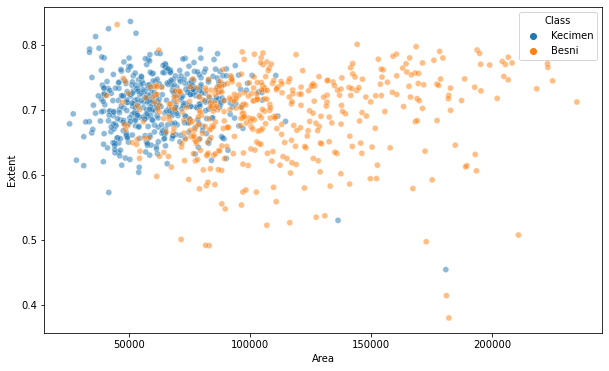

In [17]:
sns.scatterplot(x = "Area", y = "Extent", data = df, hue = "Class", alpha = 0.5);

Besni icin ayrisma yok.

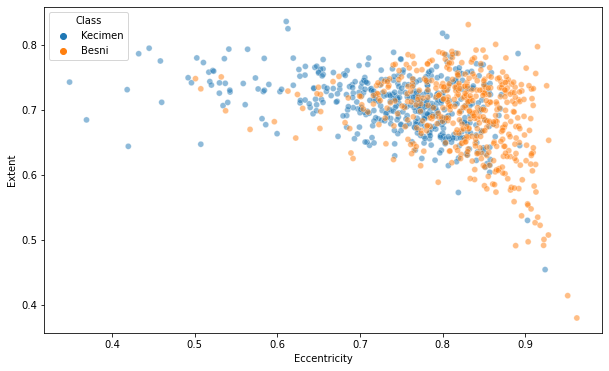

In [18]:
sns.scatterplot(x = "Eccentricity", y = "Extent", data = df, hue = "Class", alpha = 0.5);

Hic ayisma yok.Bu feature secilirse zor tahmin yapabilir.

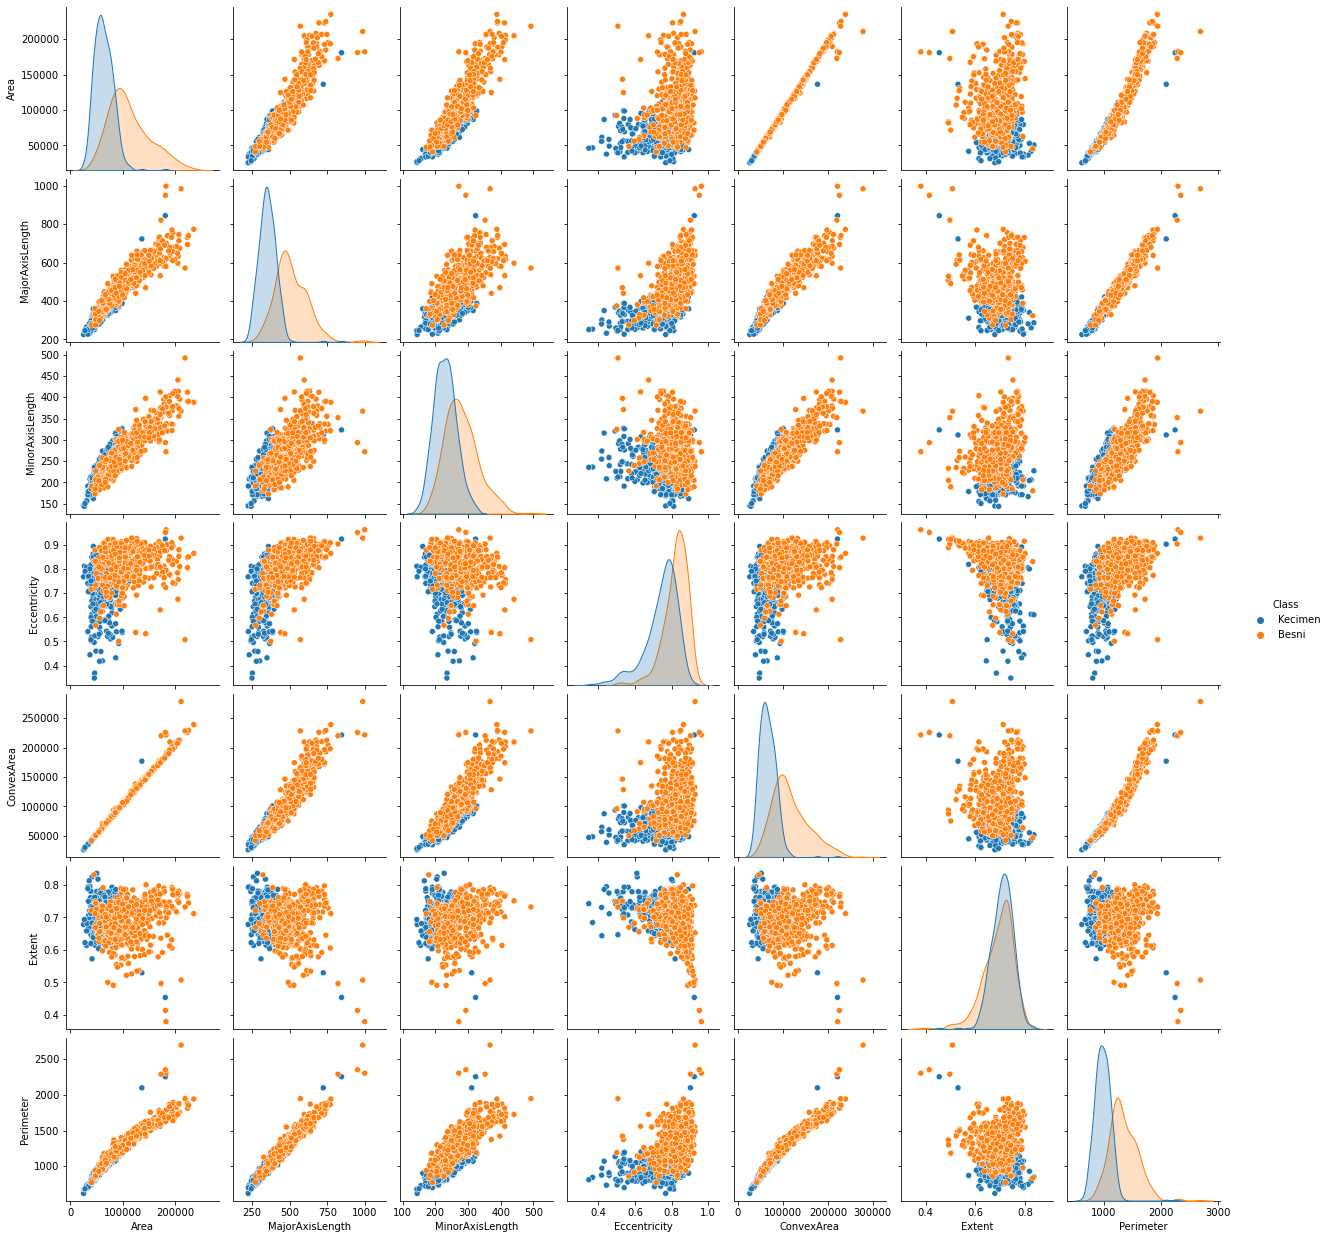

In [19]:
sns.pairplot(df,hue='Class');

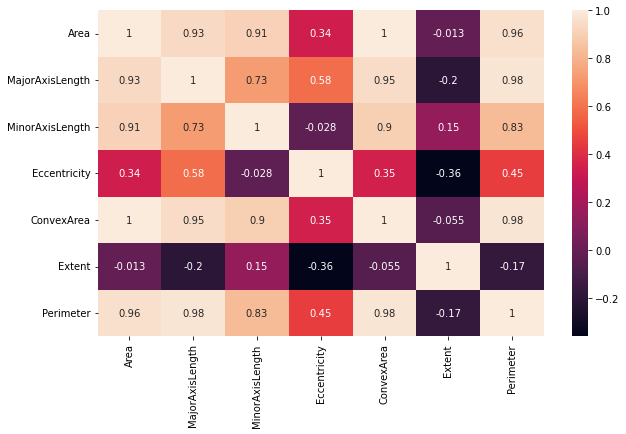

In [20]:
sns.heatmap(df.corr(), annot = True);

Area ile convex area kuvvetli super pozitif iliskili. Biri silinmeli. MajorAxis Lenght, Minor Axis Lenght, Convex Area , Area Perimeter ile kuvvetli pozitif iliskili(modele dahil edilmeyebilir), Convex area MajorAxis Lenght, Minor Axis Lenght, Perimeter, Area ile kuvvetli pozitif iliskili. Area convex area perimeter silinmeli MajorAxis Lenght, Minor Axis Lenght ile yuksek korelasyon yani kuvvetli pozitif iliski var.

In [21]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 900 entries, 0 to 899
Data columns (total 8 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Area             900 non-null    int64  
 1   MajorAxisLength  900 non-null    float64
 2   MinorAxisLength  900 non-null    float64
 3   Eccentricity     900 non-null    float64
 4   ConvexArea       900 non-null    int64  
 5   Extent           900 non-null    float64
 6   Perimeter        900 non-null    float64
 7   Class            900 non-null    object 
dtypes: float64(5), int64(2), object(1)
memory usage: 56.4+ KB


## Train | Test Split and Scaling

In [22]:
X = df.drop(["Class"], axis = 1)
y = df["Class"]

In [23]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

In [24]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, stratify=y, random_state=42)

In [25]:
scaler = StandardScaler()

In [26]:
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Logistic Regression

In [27]:
from sklearn.linear_model import LogisticRegression

In [28]:
log_model = LogisticRegression()

In [29]:
log_model.fit(X_train_scaled, y_train)

LogisticRegression()

In [30]:
y_pred = log_model.predict(X_test_scaled)

In [31]:
y_pred_proba = log_model.predict_proba(X_test_scaled)

In [32]:
test_data = pd.concat([X_test, y_test], axis=1)
test_data["pred"] = y_pred
test_data["pred_proba"] = y_pred_proba[:,1]#1 olma olasılığı
test_data.sample(10)

,Area,MajorAxisLength,MinorAxisLength,Eccentricity,ConvexArea,Extent,Perimeter,Class,pred,pred_proba
94,52243,331.451,206.760,0.782,55774,0.714,934.547,Kecimen,Kecimen,0.906
68,51727,321.127,208.767,0.760,52913,0.752,903.308,Kecimen,Kecimen,0.945
329,79106,404.573,252.066,0.782,81999,0.729,1100.850,Kecimen,Kecimen,0.631
241,43345,323.859,175.186,0.841,46785,0.649,877.020,Kecimen,Kecimen,0.902
245,56096,313.386,232.282,0.671,58701,0.712,929.115,Kecimen,Kecimen,0.945
599,152267,598.968,331.249,0.833,157353,0.594,1570.502,Besni,Besni,0.003
861,55858,298.859,239.899,0.596,58630,0.681,915.130,Besni,Kecimen,0.957
541,193032,661.149,376.432,0.822,197672,0.631,1744.271,Besni,Besni,0.000
638,101772,477.909,273.404,0.820,104567,0.684,1266.657,Besni,Besni,0.148
896,87350,440.736,259.293,0.809,90899,0.636,1214.252,Besni,Besni,0.244


## Model Performance

In [33]:
from sklearn.metrics import confusion_matrix, classification_report

In [34]:
def eval_metric(model, X_train, y_train, X_test, y_test):
    y_train_pred = model.predict(X_train)
    y_pred = model.predict(X_test)
    
    print("Test_Set")
    print(confusion_matrix(y_test, y_pred))
    print(classification_report(y_test, y_pred))
    print()
    print("Train_Set")
    print(confusion_matrix(y_train, y_train_pred))
    print(classification_report(y_train, y_train_pred))

In [35]:
eval_metric(log_model, X_train_scaled, y_train, X_test_scaled, y_test)

Test_Set
[[75 15]
 [ 5 85]]
              precision    recall  f1-score   support

       Besni       0.94      0.83      0.88        90
     Kecimen       0.85      0.94      0.89        90

    accuracy                           0.89       180
   macro avg       0.89      0.89      0.89       180
weighted avg       0.89      0.89      0.89       180


Train_Set
[[304  56]
 [ 41 319]]
              precision    recall  f1-score   support

       Besni       0.88      0.84      0.86       360
     Kecimen       0.85      0.89      0.87       360

    accuracy                           0.87       720
   macro avg       0.87      0.87      0.87       720
weighted avg       0.87      0.87      0.87       720



Recall degeri hem test hemde train datamda uyumlu ve yuksek. Accuracy hem test hem train datamda uyumlu ve yuksek.Test datamda 100 tahminden 89 dogru yapmistir model. Besni ve Kecimen dogru tahmin edebiliyor. Besni % 83 Kecimen % 94. Balanca data oldugundan bu iki deger cok onemli lakin diger degerlerde yuksek ve yakin degerlere sahiptir hem test hemde train datamda. Test datamda 90 tahmin uzerinde 15 tanesini Besni yerine Kecimen olarak tahmin etmis, 5 tanesini de Kecimen yerine Besni tahmin etmistir. Test datamda 90 tahmin uzerinde 15 tanesini Besni yerine Kecimen olarak tahmin etmis, 5 tanesini de Kecimen yerine Besni tahmin etmistir. Train datamda 360 tahmin uzerinde 56 tanesini Besni yerine Kecimen olarak tahmin etmis, 41 tanesini de Kecimen yerine Besni tahmin etmistir.

### Cross Validate

In [36]:
from sklearn.model_selection import cross_validate

In [37]:
model = LogisticRegression()

scores = cross_validate(model, X_train_scaled, y_train, scoring = ['accuracy', 'precision_weighted','recall_weighted',
                                                                   'f1_weighted'], cv = 10)
df_scores = pd.DataFrame(scores, index = range(1, 11))
df_scores

,fit_time,score_time,test_accuracy,test_precision_weighted,test_recall_weighted,test_f1_weighted
1,0.013,0.005,0.736,0.736,0.736,0.736
2,0.006,0.008,0.806,0.809,0.806,0.805
3,0.008,0.001,0.903,0.906,0.903,0.903
4,0.023,0.000,0.875,0.878,0.875,0.875
5,0.023,0.008,0.778,0.786,0.778,0.776
6,0.008,0.008,0.917,0.918,0.917,0.917
7,0.016,0.020,0.847,0.850,0.847,0.847
8,0.012,0.016,0.875,0.875,0.875,0.875
9,0.016,0.000,0.931,0.939,0.931,0.930
10,0.016,0.016,0.917,0.918,0.917,0.917


In [ ]:
#model = LogisticRegression()

#scores = cross_validate(model, X_train_scaled, y_train, scoring = ['precision','recall','f1','accuracy'], cv = 10)
#df_scores = pd.DataFrame(scores, index = range(1, 11))
#df_scores

In [38]:
df_scores.mean()[2:]

test_accuracy             0.858
test_precision_weighted   0.861
test_recall_weighted      0.858
test_f1_weighted          0.858
dtype: float64

In [ ]:



### GridSearchCV


In [47]:
from sklearn.model_selection import GridSearchCV

In [48]:
model = LogisticRegression()

penalty = ["l1", "l2"]
C = np.logspace(-1, 5, 20) # katsayı için logspace alınarak değerler verilmesi öneriliyor
class_weight= ["balanced", None] # unbalance varsa düzeltecek
# The "balanced" mode uses the values of y to automatically adjust weights inversely proportional to class frequencies 
# in the input data
solver = [ "liblinear", "sag", "saga"] # default olarak lbfgs çok değiştirilmez.hepsini görmek için verdik 

param_grid = {"penalty" : penalty,
              "C" : C,
              "class_weight":class_weight,
              "solver":solver}


grid_model = GridSearchCV(estimator=model,
                          param_grid=param_grid,
                          cv=10,
                          scoring = "recall", # 1 class ait en iyi skoru döndürecek, tek score verebiliriz
                          n_jobs = -1)

In [49]:
grid_model.fit(X_train_scaled, y_train)

GridSearchCV(cv=10, estimator=LogisticRegression(), n_jobs=-1,
             param_grid={'C': array([1.00000000e-01, 2.06913808e-01, 4.28133240e-01, 8.85866790e-01,
       1.83298071e+00, 3.79269019e+00, 7.84759970e+00, 1.62377674e+01,
       3.35981829e+01, 6.95192796e+01, 1.43844989e+02, 2.97635144e+02,
       6.15848211e+02, 1.27427499e+03, 2.63665090e+03, 5.45559478e+03,
       1.12883789e+04, 2.33572147e+04, 4.83293024e+04, 1.00000000e+05]),
                         'class_weight': ['balanced', None],
                         'penalty': ['l1', 'l2'],
                         'solver': ['liblinear', 'sag', 'saga']},
             scoring='recall')

In [50]:
grid_model.best_params_

{'C': 0.1, 'class_weight': 'balanced', 'penalty': 'l1', 'solver': 'liblinear'}

In [52]:
eval_metric(grid_model, X_train_scaled, y_train, X_test_scaled, y_test)

Test_Set
[[73 17]
 [ 4 86]]
              precision    recall  f1-score   support

       Besni       0.95      0.81      0.87        90
     Kecimen       0.83      0.96      0.89        90

    accuracy                           0.88       180
   macro avg       0.89      0.88      0.88       180
weighted avg       0.89      0.88      0.88       180


Train_Set
[[300  60]
 [ 40 320]]
              precision    recall  f1-score   support

       Besni       0.88      0.83      0.86       360
     Kecimen       0.84      0.89      0.86       360

    accuracy                           0.86       720
   macro avg       0.86      0.86      0.86       720
weighted avg       0.86      0.86      0.86       720



Balance data oldugundan accuracy bakilirsa 100 degerden 88 tanesini dogru bilmis test datada train datada 86 cikmistir. Yakin degerler bulunmustur.Cross validate ve grid searc yapildiktan sonra recall degerleri yukselmistir.

## ROC (Receiver Operating Curve) and AUC (Area Under Curve)

In [53]:
from sklearn.metrics import plot_roc_curve, plot_precision_recall_curve, roc_auc_score, auc, roc_curve, average_precision_score, precision_recall_curve

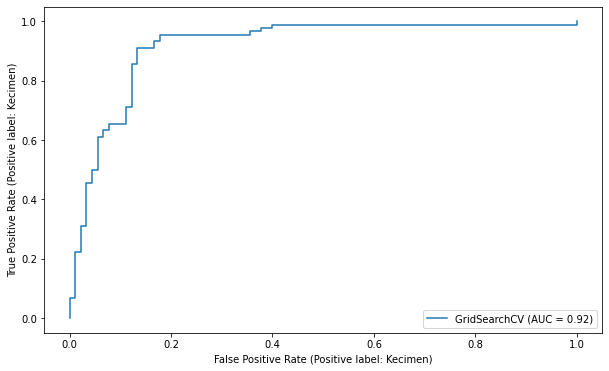

In [54]:
plot_roc_curve(grid_model, X_test_scaled, y_test);
plt.show() 

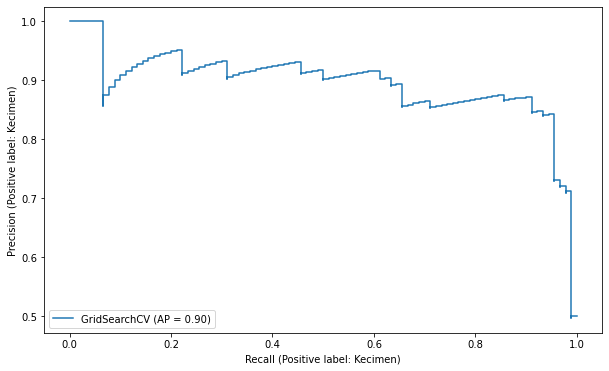

In [55]:

plot_precision_recall_curve(grid_model, X_test_scaled, y_test);
plt.show() #unbalance datalarda 




In [ ]:
Balanca dta oldugunu ispatliyor. Degerler cok yakin Roc Auc ve precision_recall/.

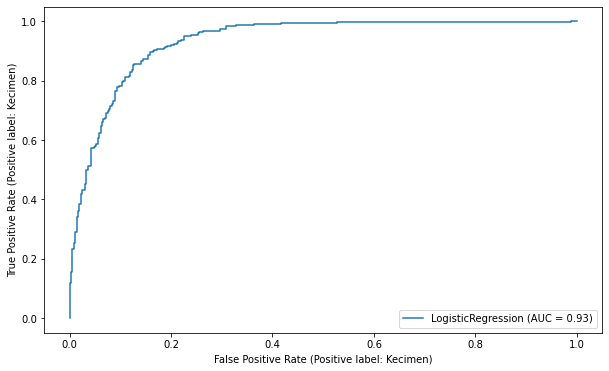

In [56]:
plot_roc_curve(log_model, X_train_scaled, y_train);  
plt.show()

In [66]:
y_pred_proba = log_model.predict_proba(X_train_scaled)
roc_auc_score(y_train, y_pred_proba[:,1])

0.9332021604938272

In [72]:
fp_rate, tp_rate, thresholds = roc_curve(y_train, y_pred_proba[:,1], pos_label="Besni")

In [68]:
#fp_rate, tp_rate, thresholds = roc_curve(y_train, y_pred_proba[:,1])

In [73]:
fp_tp_th = fp_rate, tp_rate, thresholds = roc_curve(y_train, y_pred_proba[:,1], pos_label="Besni")
df_fp_tp_th = pd.DataFrame(fp_tp_th)
df_fp_tp_th

,0,1,2,3,4,5,6,7,8,9,...,140,141,142,143,144,145,146,147,148,149
0,0.000,0.003,0.119,0.119,0.156,0.156,0.233,0.233,0.253,0.253,...,0.989,0.989,0.992,0.992,0.994,0.994,0.997,0.997,1.000,1.000
1,0.000,0.000,0.000,0.003,0.003,0.006,0.006,0.008,0.008,0.011,...,0.328,0.364,0.364,0.417,0.417,0.528,0.528,0.989,0.989,1.000
2,1.996,0.996,0.976,0.976,0.965,0.965,0.948,0.948,0.942,0.942,...,0.224,0.190,0.189,0.149,0.147,0.066,0.065,0.000,0.000,0.000


In [74]:
optimal_idx = np.argmax(tp_rate - fp_rate)# maximum değer index nosu
optimal_threshold = thresholds[optimal_idx] # bulduğumuz index nomarasının treshold değerini verir. en iyi değer default 0.5 değil treshold 0.3393 değeridir.  
optimal_threshold

1.9962814267473616

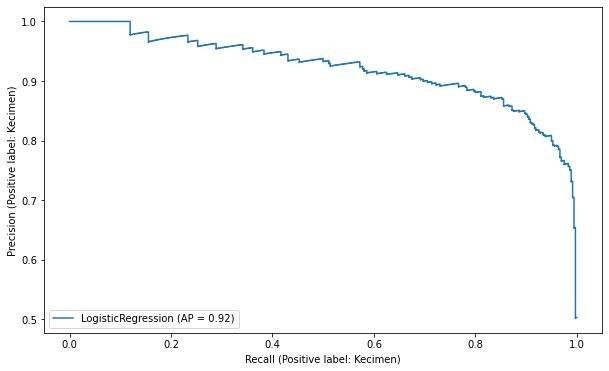

In [71]:
plot_precision_recall_curve(log_model, X_train_scaled, y_train);
plt.show()

In [76]:
y_pred_proba = log_model.predict_proba(X_train_scaled)
average_precision_score(y_train, y_pred_proba[:,1], pos_label="Besni")

0.31361116755993207

In [77]:
precisions, recalls, thresholds = precision_recall_curve(y_train, y_pred_proba[:,1], pos_label="Besni")

In [78]:
optimal_idx = np.argmax((2 * precisions * recalls) / (precisions + recalls)) #buda formülü aslında f1 skorun formülü
optimal_threshold = thresholds[optimal_idx]
optimal_threshold

0.9764646268958093

In [79]:
grid_model.predict_proba(X_test_scaled)[:,1]

array([5.56754919e-01, 7.21842999e-03, 3.63754039e-02, 8.41790026e-01,
       2.21076378e-01, 7.66426937e-01, 1.14993874e-01, 9.65851430e-01,
       9.76598612e-01, 9.90333154e-01, 8.04927382e-01, 6.89561717e-01,
       9.67650603e-01, 7.83122428e-01, 9.23172651e-03, 5.47275823e-01,
       6.16724946e-01, 7.45795988e-01, 7.36441045e-02, 9.10243642e-03,
       2.32292533e-01, 7.83723206e-01, 9.00395379e-01, 9.17045597e-01,
       9.18937133e-01, 7.74941072e-01, 6.63600934e-01, 7.04813639e-01,
       7.68142224e-01, 9.28898487e-01, 9.91978159e-01, 8.80635584e-01,
       4.81289066e-02, 2.11445643e-01, 4.81723353e-01, 1.56002188e-05,
       6.73658724e-01, 7.65107362e-02, 1.50608205e-01, 1.97397639e-03,
       9.32161700e-03, 9.30391546e-02, 1.30993149e-01, 3.77983909e-01,
       3.27089439e-03, 1.21857118e-02, 1.00715766e-01, 8.83447669e-01,
       1.57013024e-01, 2.96395947e-01, 9.18447422e-01, 9.25472029e-01,
       4.01947838e-01, 9.67882465e-01, 3.08713884e-01, 8.72875108e-01,
      

In [119]:
y_pred2 = pd.Series(grid_model.predict_proba(X_test_scaled)[:,1]).apply(lambda x : 1 if x >= optimal_threshold else 0)

In [120]:
print(confusion_matrix(y_test, y_pred2)) 
print(classification_report(y_test,y_pred2 ))

TypeError: Labels in y_true and y_pred should be of the same type. Got y_true=['Besni' 'Kecimen'] and y_pred=[0 1]. Make sure that the predictions provided by the classifier coincides with the true labels.

In [121]:
y_train_pred2 = pd.Series(grid_model.predict_proba(X_train_scaled)[:,1]).apply(lambda x : 1 if x >= optimal_threshold else 0)
print(confusion_matrix(y_test, y_pred2, labels=["Besni"==0, "Kecimen"==1])) 
print(classification_report(y_train, y_train_pred2, labels=["Besni", "Kecimen"]))

TypeError: Labels in y_true and y_pred should be of the same type. Got y_true=['Besni' 'Kecimen'] and y_pred=[0 1]. Make sure that the predictions provided by the classifier coincides with the true labels.

In [122]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
from sklearn.model_selection import StratifiedKFold

def CV(n, est, X, y, optimal_threshold):
    skf = StratifiedKFold(n_splits = n, shuffle = True, random_state = 42)
    acc_scores = []
    pre_scores = []
    rec_scores = []
    f1_scores  = []
    
    X = X.reset_index(drop=True)
    y = y.reset_index(drop=True)
    
    for train_index, test_index in skf.split(X, y):
        
        X_train = X.loc[train_index]
        y_train = y.loc[train_index]
        X_test = X.loc[test_index]
        y_test = y.loc[test_index]
        
        
        est = est
        est.fit(X_train, y_train)
        y_pred = est.predict(X_test)
        y_pred_proba = est.predict_proba(X_test)
             
        y_pred2 = pd.Series(y_pred_proba[:,1]).apply(lambda x : 1 if x >= optimal_threshold else 0)
        
        acc_scores.append(accuracy_score(y_test, y_pred2))
        pre_scores.append(precision_score(y_test, y_pred2, pos_label=1))
        rec_scores.append(recall_score(y_test, y_pred2, pos_label=1))
        f1_scores.append(f1_score(y_test, y_pred2, pos_label=1))
    
    print(f'Accuracy {np.mean(acc_scores)*100:>10,.2f}%  std {np.std(acc_scores)*100:.2f}%')
    print(f'Precision-1 {np.mean(pre_scores)*100:>7,.2f}%  std {np.std(pre_scores)*100:.2f}%')
    print(f'Recall-1 {np.mean(rec_scores)*100:>10,.2f}%  std {np.std(rec_scores)*100:.2f}%')
    print(f'F1_score-1 {np.mean(f1_scores)*100:>8,.2f}%  std {np.std(f1_scores)*100:.2f}%')

In [123]:
model = LogisticRegression(C= 0.1, class_weight= 'balanced',penalty= 'l1',solver= 'liblinear')
CV(10, model, pd.DataFrame(X_train_scaled), y_train,0.5) #model = LogisticRegression(C= 0.1, class_weight= 'balanced',penalty= 'l1',solver= 'liblinear')
#CV(10, model, pd.DataFrame(X_train_scaled), y_train, optimal_threshold)

TypeError: Labels in y_true and y_pred should be of the same type. Got y_true=['Besni' 'Kecimen'] and y_pred=[0 1]. Make sure that the predictions provided by the classifier coincides with the true labels.

# Conclusion 